 # Augmentation

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
from   torchvision import datasets
from   PIL import Image

import albumentations as A
from   albumentations.pytorch import ToTensorV2

from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Load images from CIFAR10 dataset

In [3]:
dataset = datasets.CIFAR10(root = 'data',  download = True)       

print("classes:", dataset.classes )                                # class names
images = dataset.data[np.array(dataset.targets) == 7]              # only horses (class=7)
print(images.shape,  images.dtype, images.min(), images.max())

Files already downloaded and verified
classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(5000, 32, 32, 3) uint8 0 255


## A

Augmentation generally works only with `numpy` arrays and only with `uint8` type (otherwise OpenCV breaks).<br>
The channel order must be `(H,W,C)`.<br>
Therefore, the conversion to a `pytorch` tensor, its normalization, permute to `(C,H,W)` must occur **after** the authentication.

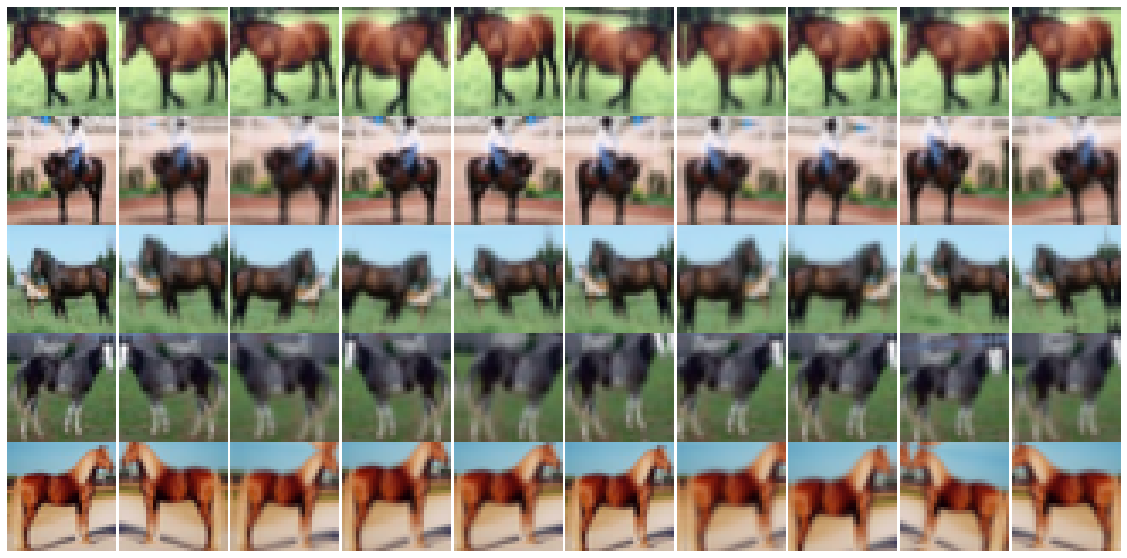

In [32]:
# Declare an augmentation pipeline:
transform = A.Compose([                          
    A.RandomResizedCrop(height=32, width=32, scale=(0.8, 1.), ratio=(0.9, 1.1)),
    #A.VerticalFlip  (p=0.5),
    A.HorizontalFlip(p=0.5),   
    A.ShiftScaleRotate(rotate_limit=10),
    #A.Rotate(limit=90),
    #A.RandomScale(0.5),
    #A.RandomBrightnessContrast(p=0.2),    
])

cols, rows, i = 10,5,1
plt.figure(figsize=(2*cols, 2*rows))  
for row in range(rows):    
    for col in range(cols):                
        image = images[row]
        if col > 0:
            image = transform(image=image)["image"]   # Augment an image
            
        plt.subplot(rows, cols, i); plt.imshow(image); plt.axis('off'); i += 1
plt.subplots_adjust(wspace=0, hspace=0)          
plt.show()

In [30]:
transform = A.Compose([     
    A.Normalize(mean=(0.,0.,0.), std=(1.,1.,1.)),
    ToTensorV2(),    
])
X = transform(image=images[0])["image"]
print(X.shape, X.mean((1,2)), X.std((1,2)))

torch.Size([3, 32, 32]) tensor([0.5194, 0.5285, 0.3838]) tensor([0.2103, 0.2734, 0.1747])


# TorchVision

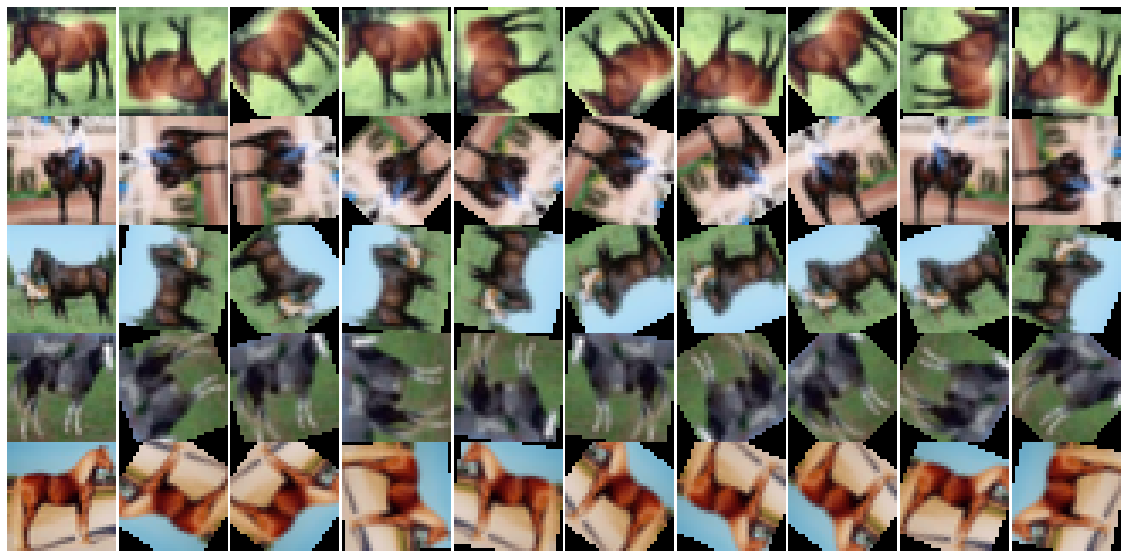

In [16]:
import imageio as imageio
import torch
from torchvision  import transforms
transform = transforms.Compose([                              
                    transforms.RandomHorizontalFlip(p=0.5),
                    transforms.RandomVerticalFlip(p=0.5),
                    transforms.RandomRotation(degrees=90, interpolation=transforms.functional.InterpolationMode.BILINEAR),
])

cols, rows, i = 10,5,1
plt.figure(figsize=(2*cols, 2*rows))  
for row in range(rows):    
    for col in range(cols):                
        image = images[row]
        if col > 0:
            image = Image.fromarray(image)    # convert to PIL Image !!!
            image = transform(image)            
            
        plt.subplot(rows, cols, i); plt.imshow(image); plt.axis('off'); i += 1
plt.subplots_adjust(wspace=0, hspace=0)          
plt.show()